<a href="https://colab.research.google.com/github/piyushbg/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

 The purpose of this project is to investigate the impact of a fraud case involving Rana Kapoor on the stock prices of Yes Bank, a major Indian bank. The project used a dataset of Yes Bank's monthly stock prices since its inception, including closing, opening, highest, and lowest stock prices.

Three models were developed to predict the stock's closing price: Ridge regression, Random Forest, and XGBoost Regressor. The model was trained on historical stock price data and features such as the mean of Open, High, and Low features. Additional features were created by taking lags to capture temporal trends and patterns in the data. The model's performance was evaluated using metrics such as RMSE (Root Mean Squared Error), adjusted R2, and R2 score. The XGBoost regressor performed the best of the three with high R2 score and adjusted R2.

The goal of the analysis was to uncover any patterns or changes in stock prices related to the fraud case involving Rana Kapoor. The feature importance provided by the XGBoost model helped identify the key factors influencing the stock price.

Overall, the project aimed to improve understanding of the relationship between the fraud case and Yes Bank's stock prices and to explore the potential of predictive models in the financial domain. The findings and insights gained from this project can be used by investors, analysts, and decision-makers to make informed investment or business decisions related to Yes Bank's stock.



# **GitHub Link -**https://github.com/piyushbg/Yes-Bank-Stock-Closing-Price-Prediction

Provide your GitHub Link here.

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. In 2018, it was involved in a fraud case that made headlines. This dataset has monthly stock prices of the bank since its inception, including closing, opening, highest, and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.

A stock is a financial instrument that represents ownership in a company. Stocks are bought and sold on stock exchanges, and are the foundation of many individual investors' portfolios.

The business objective is to use a regression model to accurately predict the closing price of Yes Bank stock. This would allow stakeholders to make well-informed investment decisions, manage risks effectively, optimize portfolios, and align investment strategies with financial goals.

The steps involved in the project are:









1.   Data preprocessing

2.  Data cleaning

3.  Data duplication
4.
Handling outliers


5.   Feature transformation


6.   Exploratory data analysis

7.   Encoding of categorical columns

8.  Algorithm selection








# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
# Import Libraries
import numpy as np                                                           #numerical computations
import pandas as pd                                                          #to load the data


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns                                                        # for visualization


from sklearn.preprocessing import (MinMaxScaler,StandardScaler)              #scaling the data
from sklearn.model_selection import train_test_split                        # split train and test data

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import (Lasso, Ridge,ElasticNet, LassoCV, RidgeCV, ElasticNetCV)

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [5]:
# Load Dataset


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices.csv')

### Dataset First View

In [8]:
# Dataset First Look
dataset.head()

Date   Open   High    Low  Close
0  Jul-05  13.00  14.00  11.25  12.46
1  Aug-05  12.58  14.88  12.55  13.42
2  Sep-05  13.48  14.87  12.27  13.30
3  Oct-05  13.20  14.47  12.40  12.99
4  Nov-05  13.35  13.88  12.88  13.41

In [9]:
dataset



Date   Open   High    Low  Close
0    Jul-05  13.00  14.00  11.25  12.46
1    Aug-05  12.58  14.88  12.55  13.42
2    Sep-05  13.48  14.87  12.27  13.30
3    Oct-05  13.20  14.47  12.40  12.99
4    Nov-05  13.35  13.88  12.88  13.41
..      ...    ...    ...    ...    ...
180  Jul-20  25.60  28.30  11.10  11.95
181  Aug-20  12.00  17.16  11.85  14.37
182  Sep-20  14.30  15.34  12.75  13.15
183  Oct-20  13.30  14.01  12.11  12.42
184  Nov-20  12.41  14.90  12.21  14.67

[185 rows x 5 columns]

In [10]:
dataset.tail()

Date   Open   High    Low  Close
180  Jul-20  25.60  28.30  11.10  11.95
181  Aug-20  12.00  17.16  11.85  14.37
182  Sep-20  14.30  15.34  12.75  13.15
183  Oct-20  13.30  14.01  12.11  12.42
184  Nov-20  12.41  14.90  12.21  14.67

### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
dataset.size


925

In [12]:
dataset.shape

(185, 5)

### Dataset Information

In [13]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [16]:
dataset.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [17]:
# Visualizing the missing values


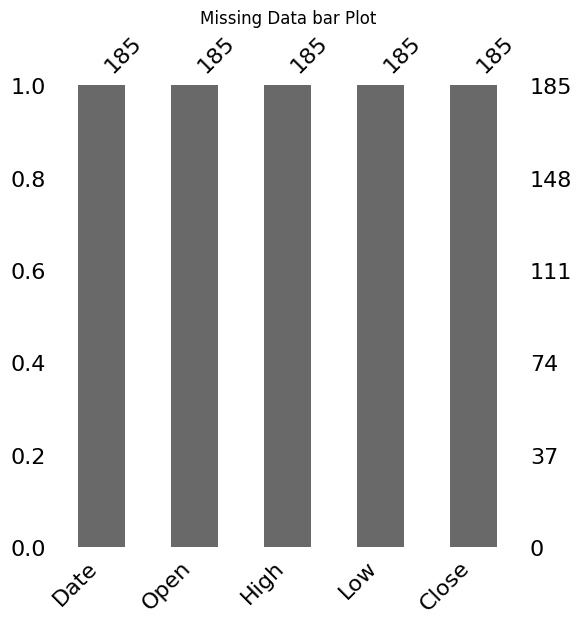

In [18]:
# Visualizing the missing values
import missingno as msno


msno.bar(dataset,figsize=(6,6))


plt.title('Missing Data bar Plot')
plt.show()



### What did you know about your dataset?

The dataset contains 5 columns and 185 records of monthly stock prices from July 2005 to November 2020. The 4 independent variables are Date, Open, High, and Low, while the dependent variable is Close. There are no duplicate values, null values, or missing values in the data. The independent variables are all of float data type, except Date which is of object data type and needs to be converted to datetime.



1.  Date: The date of the stock price.
2.   
Open: The opening price of the stock on that date.

3.  High: The highest price of the stock on that date.
4.   Low: The lowest price of the stock on that date.

5. Close: The closing price of the stock on that date.











## ***2. Understanding Your Variables***

In [19]:
# Dataset Columns
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [20]:
# Dataset Describe
dataset.describe(include='all')

Date        Open        High         Low       Close
count      185  185.000000  185.000000  185.000000  185.000000
unique     185         NaN         NaN         NaN         NaN
top     Jul-05         NaN         NaN         NaN         NaN
freq         1         NaN         NaN         NaN         NaN
mean       NaN  105.541405  116.104324   94.947838  105.204703
std        NaN   98.879850  106.333497   91.219415   98.583153
min        NaN   10.000000   11.240000    5.550000    9.980000
25%        NaN   33.800000   36.140000   28.510000   33.450000
50%        NaN   62.980000   72.550000   58.000000   62.540000
75%        NaN  153.000000  169.190000  138.350000  153.300000
max        NaN  369.950000  404.000000  345.500000  367.900000

### Variables Description

Date - Date of the record. It has monthly dates from July 2005 to November
2020. data type is object need to change into datetime

Open- opening price of the share/stock (Numerical)

High - Highest price of the share for that day (Numerical)

Low - Lowest Price of the share for that day (Numerical)

Close - Closing price of the share for that day (Numerical

### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print('unique values in ',i, 'are', dataset[i].nunique())


unique values in  Date are 185
unique values in  Open are 183
unique values in  High are 184
unique values in  Low are 183
unique values in  Close are 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [22]:
# Write your code to make your dataset analysis ready.
#copy of my dataset
dataset_copy= dataset.copy()

In [23]:
dataset_copy.head()

Date   Open   High    Low  Close
0  Jul-05  13.00  14.00  11.25  12.46
1  Aug-05  12.58  14.88  12.55  13.42
2  Sep-05  13.48  14.87  12.27  13.30
3  Oct-05  13.20  14.47  12.40  12.99
4  Nov-05  13.35  13.88  12.88  13.41

In [24]:
dataset_copy.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [25]:
len(dataset_copy[dataset_copy.duplicated()])

0

In [26]:
#converting datatype of Date from string to Datetime

from datetime import datetime

dataset_copy['Date']=pd.to_datetime(dataset_copy['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [27]:
dataset_copy.head()

Date   Open   High    Low  Close
0 2005-07-01  13.00  14.00  11.25  12.46
1 2005-08-01  12.58  14.88  12.55  13.42
2 2005-09-01  13.48  14.87  12.27  13.30
3 2005-10-01  13.20  14.47  12.40  12.99
4 2005-11-01  13.35  13.88  12.88  13.41

In [28]:
dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [29]:
dataset_copy.describe()

Open        High         Low       Close
count  185.000000  185.000000  185.000000  185.000000
mean   105.541405  116.104324   94.947838  105.204703
std     98.879850  106.333497   91.219415   98.583153
min     10.000000   11.240000    5.550000    9.980000
25%     33.800000   36.140000   28.510000   33.450000
50%     62.980000   72.550000   58.000000   62.540000
75%    153.000000  169.190000  138.350000  153.300000
max    369.950000  404.000000  345.500000  367.900000

In [30]:
col=dataset_copy.columns.to_list()
numerical_cols=col[1:]
numerical_cols


['Open', 'High', 'Low', 'Close']

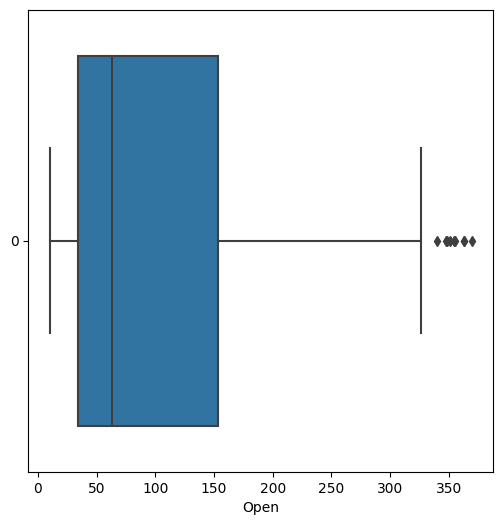

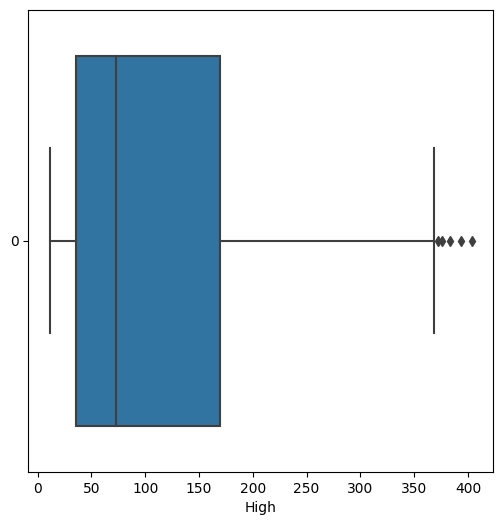

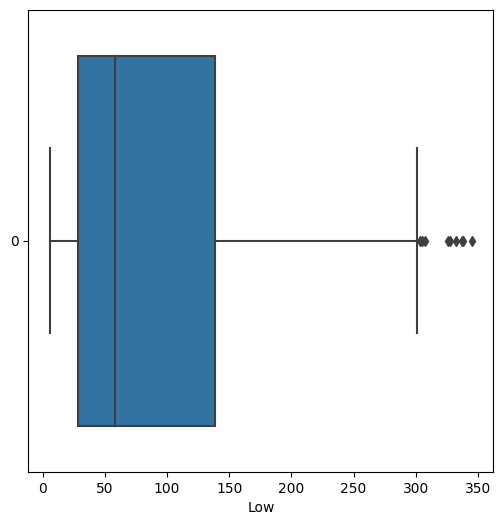

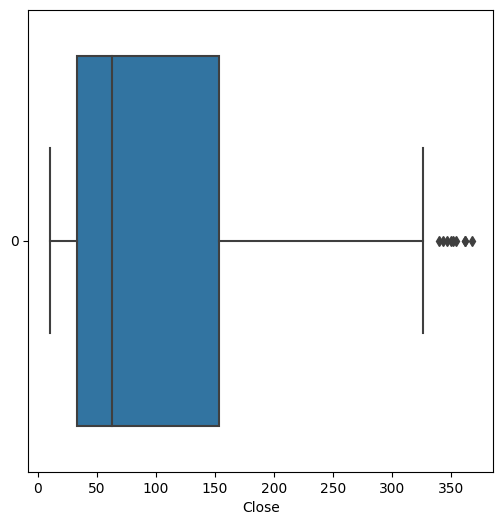

In [31]:
for column in numerical_cols:
  plt.figure(figsize=(6,6))
  sns.boxplot(dataset_copy[column],orient='h')
  plt.xlabel(column, fontsize=10)
  plt.show()

In [32]:
dataset_copy.set_index('Date', inplace=True)

In [33]:
dataset_copy.head()

Open   High    Low  Close
Date                                  
2005-07-01  13.00  14.00  11.25  12.46
2005-08-01  12.58  14.88  12.55  13.42
2005-09-01  13.48  14.87  12.27  13.30
2005-10-01  13.20  14.47  12.40  12.99
2005-11-01  13.35  13.88  12.88  13.41

In [34]:
independent_variables = dataset_copy.columns.tolist()[:-1]
dependent_variable = ['Close']

print(independent_variables)
print(dependent_variable)

['Open', 'High', 'Low']
['Close']


### What all manipulations have you done and insights you found?

The Date variable has been changed to datetime data type. The remaining variables are numerical, and include Open, High, Low, and Close (the dependent variable). There are no null values or duplicate values in the dataset. The data is clean and ready for visualization. The mean of the numerical columns is higher, which suggests that the data may be skewed.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

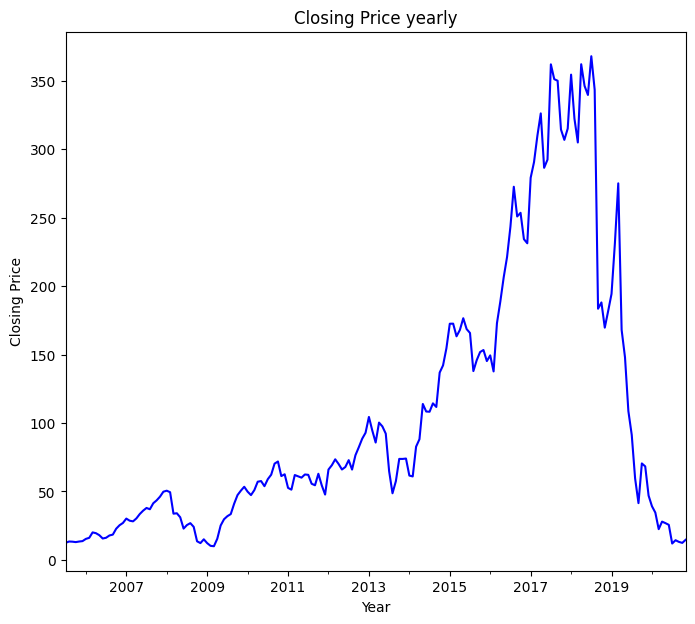

In [35]:
# Chart - 1 visualization code
plt.figure(figsize=(8,7))
dataset_copy['Close'].plot(color = 'b')

plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price yearly')
plt.show()

##### 1. Why did you pick the specific chart?

To check how closing price trends  each year.

##### 2. What is/are the insight(s) found from the chart?

By seeing the plot, it is evident that after the fraud case in 2018, the closing price took a huge hit and dropped significantly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, because of the 2018  fraud the yes bank stock has suffered immensily from 2018. That should not happen in the future.

#### Chart - 2

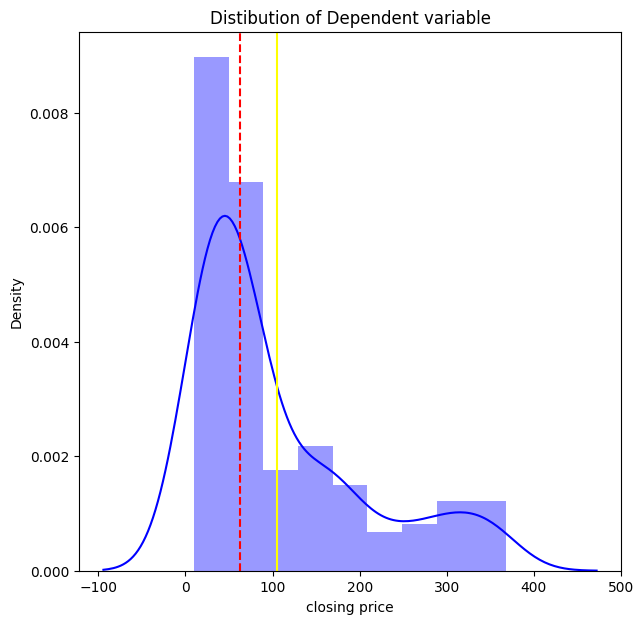

In [39]:
# Chart - 2 visualization code

#checking the distribution of the dependent variable
plt.figure(figsize=(7,7))
sns.distplot(dataset_copy['Close'],color="b")
plt.title('Distibution of Dependent variable')
plt.xlabel('closing price')

plt.axvline(dataset_copy['Close'].mean(),color='yellow')
plt.axvline(dataset_copy['Close'].median(),color='red',linestyle='dashed')
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of the Dependent variable. distplot gives more accurate result.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that the data is somewhat positively skewed(right skew).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by observing the chart we now know that the closing price will always change over a period of time and that too because of the fraud in 2018, data is skewed positively. transformation need to be applied which will result in better prediction of closing price.

#### Chart - 3

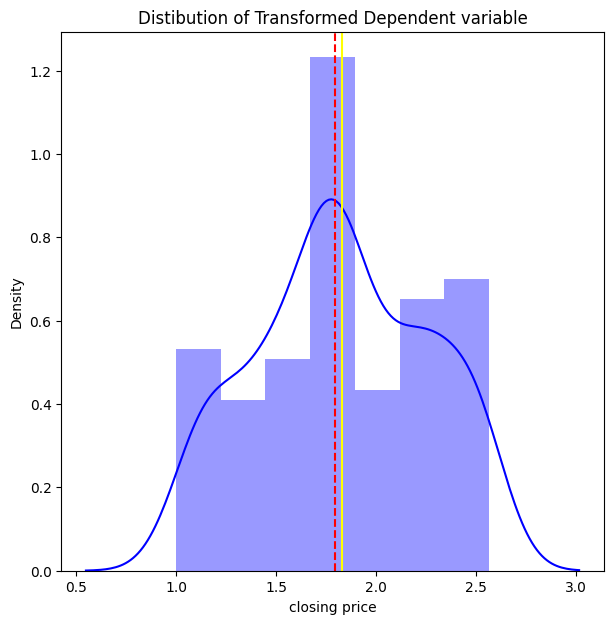

In [40]:
# Chart - 3 visualization code
#applying log transformation
plt.figure(figsize=(7,7))
sns.distplot(np.log10(dataset_copy['Close']),color="b")
plt.title('Distibution of Transformed Dependent variable')
plt.xlabel('closing price')


plt.axvline(np.log10(dataset_copy['Close']).mean(),color='yellow')
plt.axvline(np.log10(dataset_copy['Close']).median(),color='red',linestyle='dashed')
plt.show()

##### 1. Why did you pick the specific chart?

to see the distribution of y variable

##### 2. What is/are the insight(s) found from the chart?

After the log transformation it nearly looks like normal distribution.
mean and median are almost same

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If the data is normally distributed, it becomes easy to develop a good model

#### Chart - 4

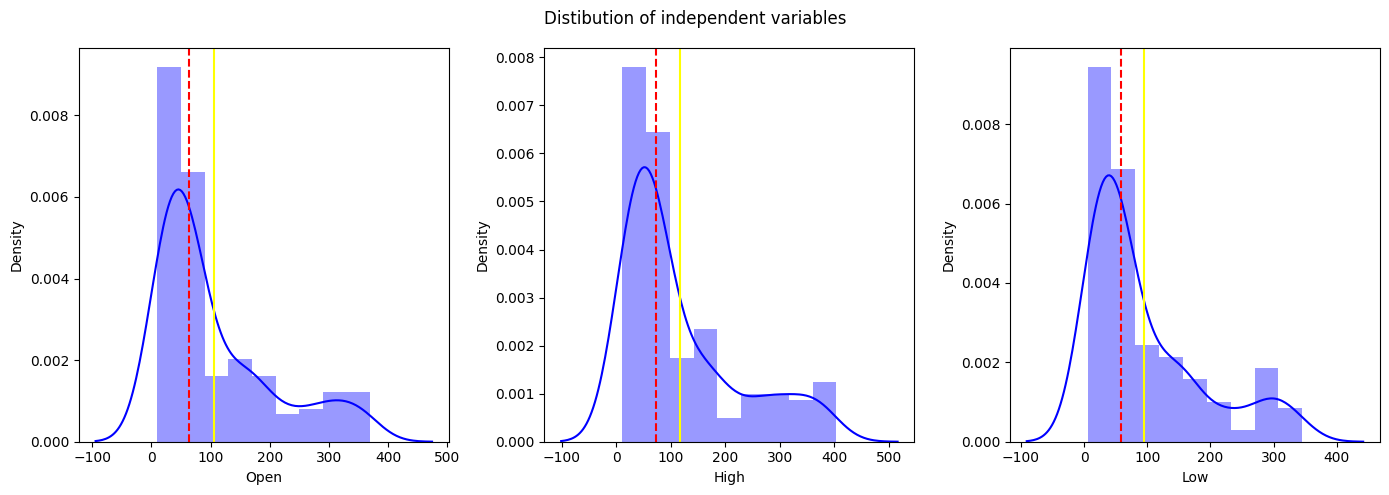

In [41]:
# Chart - 4 visualization code

# Plotting the distributions of Independent features.
plt.figure(figsize=(14, 5))

for i, col in enumerate(independent_variables):
    plt.subplot(1, 3, i+1)
    sns.distplot(dataset_copy[col], color='b')
    plt.xlabel(col, fontsize=10)

    # Plotting the mean and the median.
    plt.axvline(dataset_copy[col].mean(), color='yellow')
    plt.axvline(dataset_copy[col].median(), color='red', linestyle='dashed')

plt.suptitle('Distibution of independent variables')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

TO see the distributions across all independent variables.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that all the independent variables are right skewed and transformation is required

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By observing above chart I came to know that transformation need to be applied on all independent variables which will essentially require for a good model

#### Chart - 5

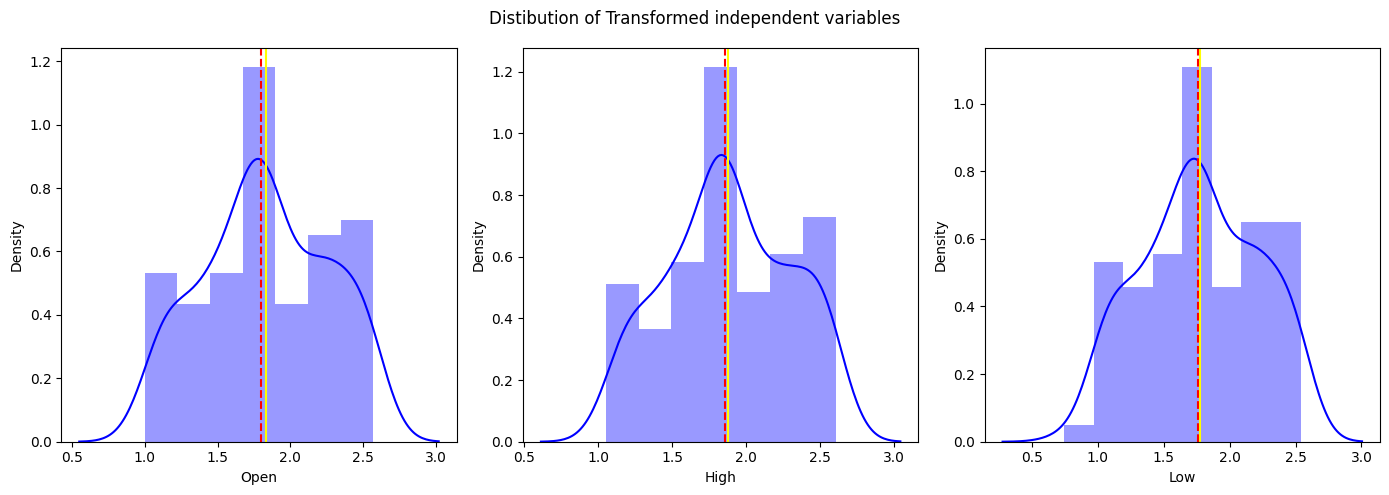

In [51]:
# Chart - 5 visualization code
plt.figure(figsize=(14, 5))

for i, col in enumerate(independent_variables):
    plt.subplot( 1, 3,i+1)
    sns.distplot(np.log10(dataset_copy[col]), color='b')
    plt.xlabel(col, fontsize=10)

    # Plotting the mean and the median.
    plt.axvline(np.log10(dataset_copy[col]).mean(), color='yellow')
    plt.axvline(np.log10(dataset_copy[col]).median(), color='red', linestyle='dashed')

plt.suptitle('Distibution of Transformed independent variables')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

TO see the distributions across all independent variables after transformation applied.

##### 2. What is/are the insight(s) found from the chart?

After the log Transformation, the data of all indepedent variables closely follow normal distribution

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can build best model if the data is normally distributed.

#### Chart - 6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.2 MB/s eta 0:00:00


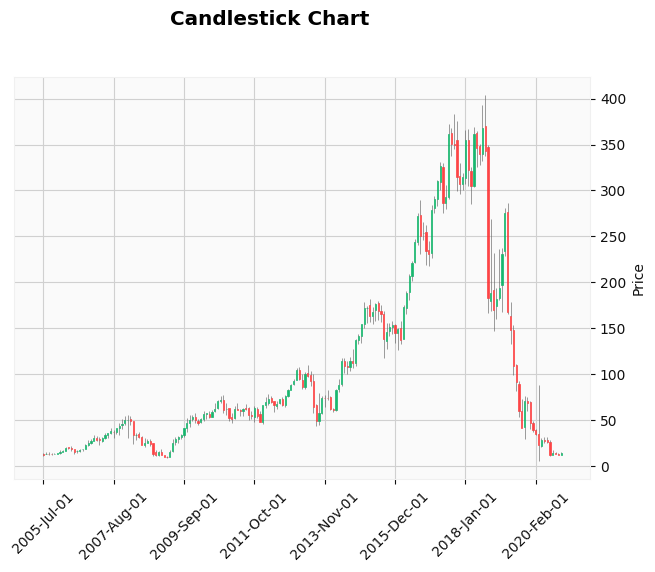

In [52]:
# Chart - 6 visualization code
!pip install mplfinance

import mplfinance as mpf

df_candle = dataset_copy[['Open', 'High', 'Low', 'Close']]

mpf.plot(df_candle, type='candle', style='yahoo', title='Candlestick Chart')

##### 1. Why did you pick the specific chart?

candle sticks are most widely used finance world. with this chart I want to see how variables are each month.

##### 2. What is/are the insight(s) found from the chart?

from the above chart, there is no much deviation from the price shown by open, high, low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ii is important to make sure that there is no huge variation in the data.

#### Chart - 7

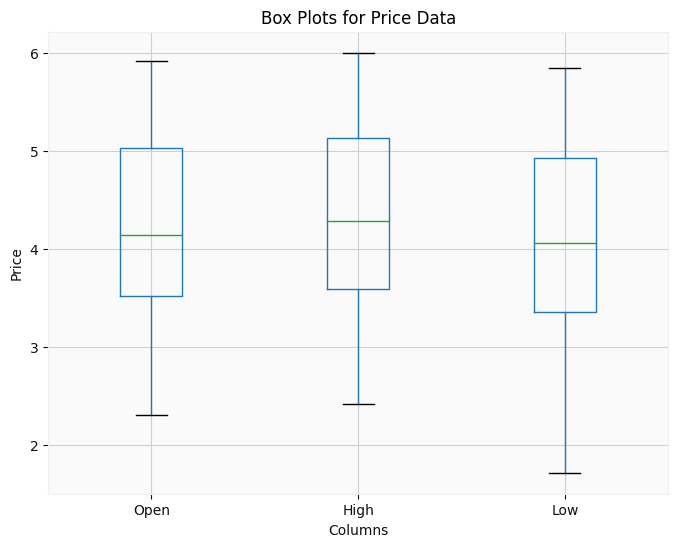

In [53]:
# Chart - 7 visualization code
df_price = np.log(dataset_copy[['Open', 'High', 'Low']])

plt.figure(figsize=(8, 6))
df_price.boxplot()
plt.xlabel('Columns')
plt.ylabel('Price')
plt.title('Box Plots for Price Data')
plt.show()

##### 1. Why did you pick the specific chart?

TO see outliers exists or not in the independent variables.

##### 2. What is/are the insight(s) found from the chart?

After transformation applied, outliers appeared to be diminished.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Outliers are not present in the data, this helps us building a good model, however given the dataset that small, it is also not advisable to completely remove outliers.

#### Chart - 8

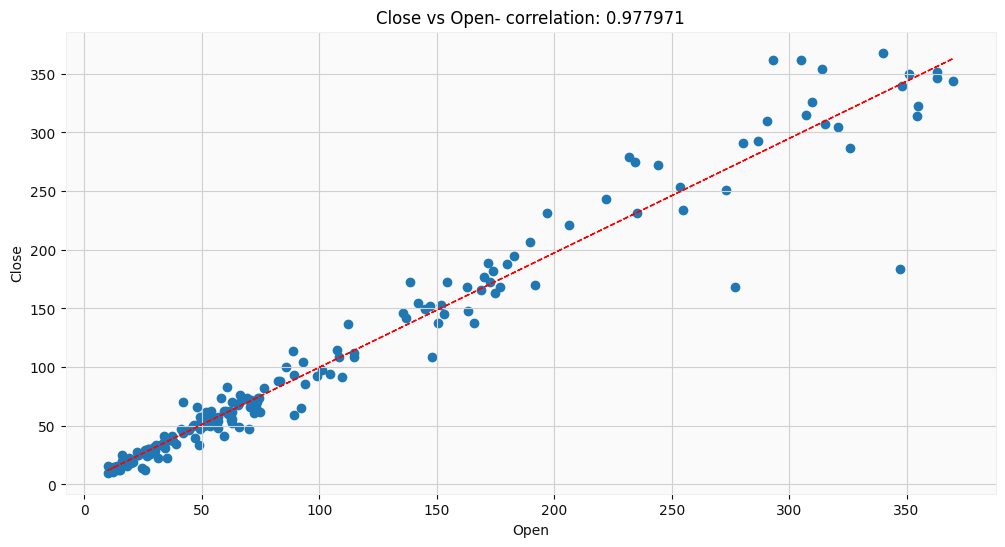

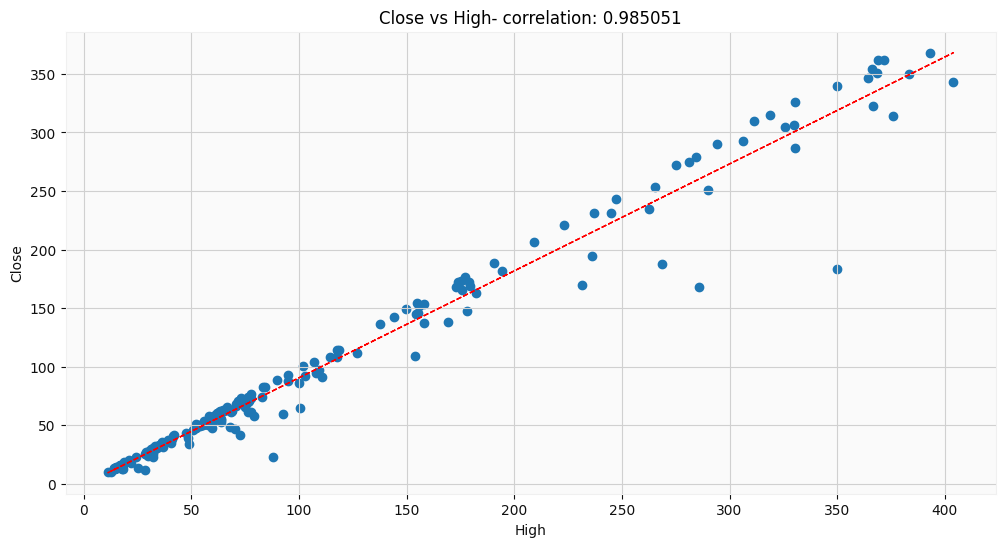

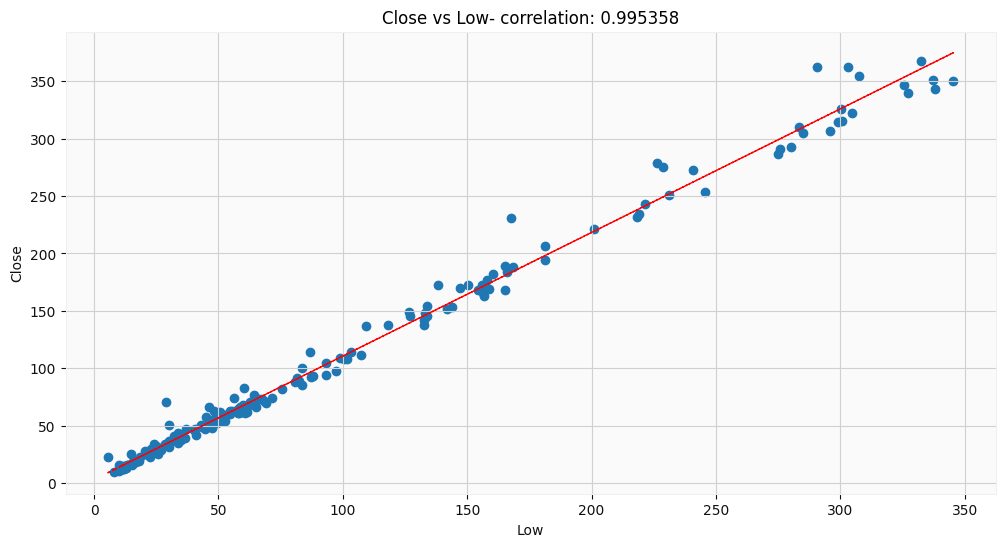

In [54]:
# Chart - 8 visualization code
# Plotting the independent variables against dependent variable and checking the correlation between them.
for col in independent_variables:

  fig = plt.figure(figsize=(12, 6))
  ax = fig.gca()
  feature = dataset_copy[col]
  label = dataset_copy['Close']
  correlation = feature.corr(label)        # calculating the correlation between dependent variable and independent features.
  plt.scatter(x=feature, y=label)          # plotting dependent variables against independent features.


  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('Close vs ' + col + '- correlation: ' + str(round((correlation),6)))

  z = np.polyfit(dataset_copy[col], dataset_copy['Close'], 1)
  y_ = np.poly1d(z)(dataset_copy[col])

  plt.plot(dataset_copy[col], y_, "r--", lw=1)

plt.show()


##### 1. Why did you pick the specific chart?

I want to plot correlation between independent variable and dependent variable.

##### 2. What is/are the insight(s) found from the chart?

It seems that all independent variables are highly correlated and linear in fashion to dependent variable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

when independent variables are highly correlated to y variable, it means that linear regression is going to be good fit model and also can produce good accuracy.

#### Chart - 9

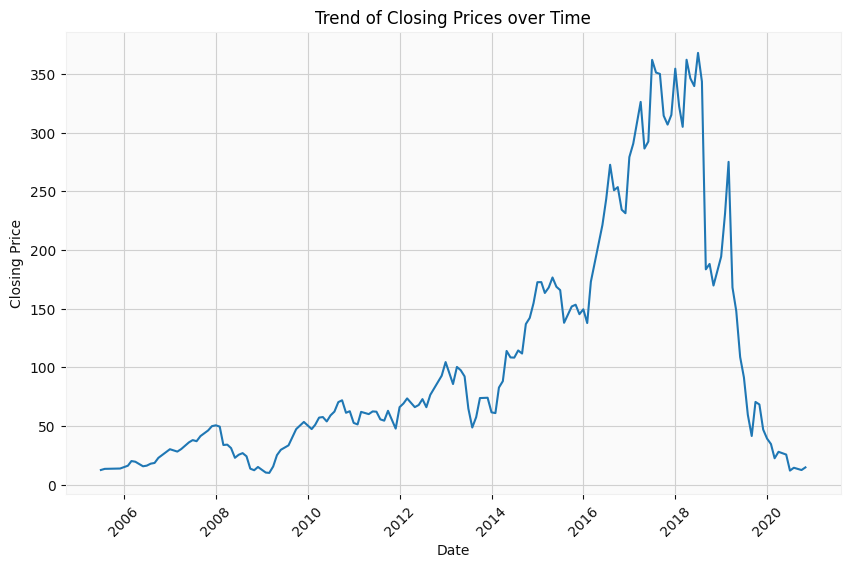

In [55]:
# Chart - 9 visualization code
# Extract the date and closing price columns from the dataset
dates = dataset_copy.index
closing_prices = dataset_copy['Close']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(dates, closing_prices)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Trend of Closing Prices over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

<Axes: >

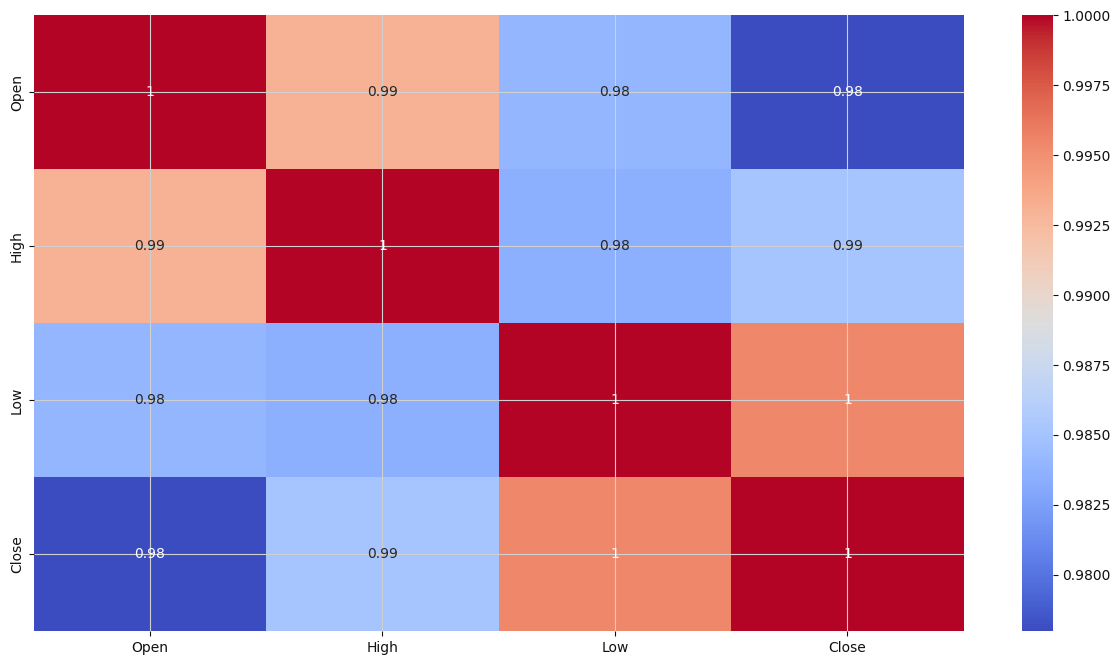

In [56]:
# Chart - 10 visualization code
# Correlation Heatmap visualization code

plt.figure(figsize=(15,8))
correlation = dataset_copy.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

To identify the correlation between variables.

##### 2. What is/are the insight(s) found from the chart?

It is expected that all independent variables are correlated to each other because opening price, high price, low price will not vary much in the finance sector. So, I am going to do feature generation to avoid multicollinearity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

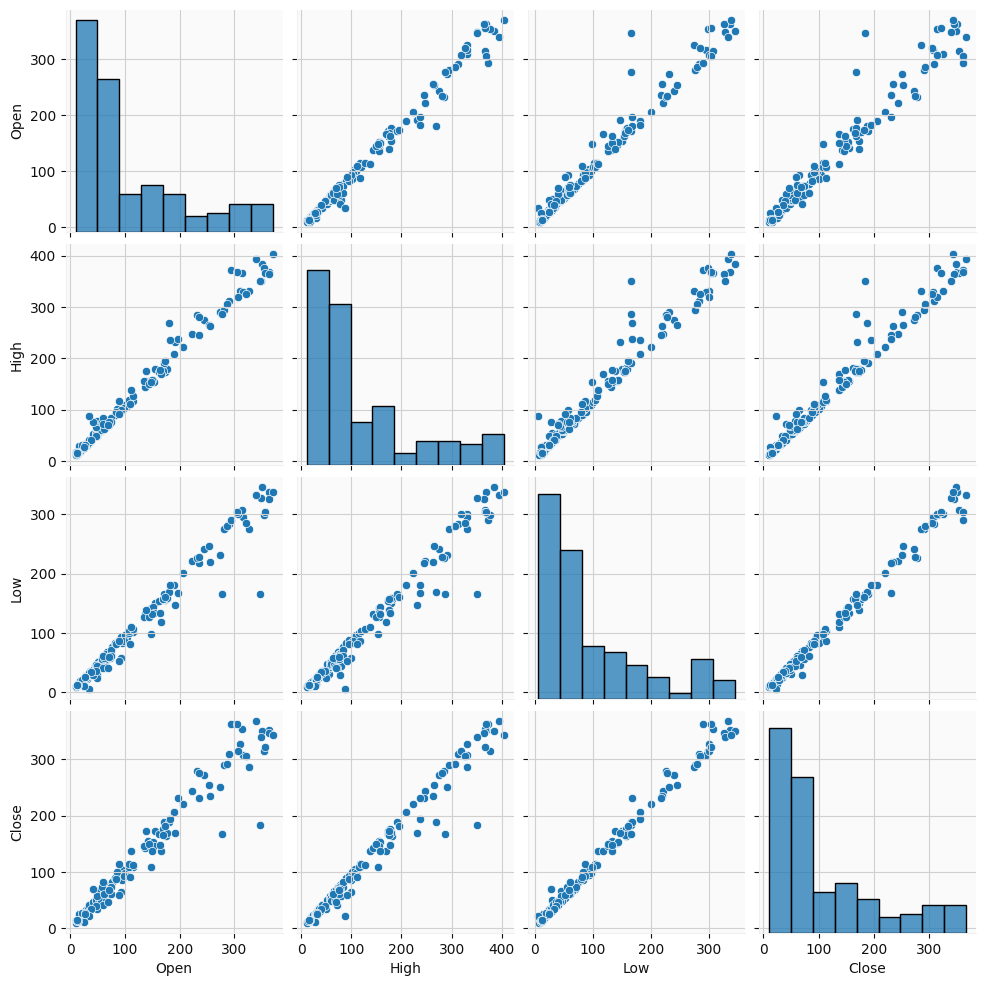

In [57]:
# Chart - 11 visualization code
# Pair Plot visualization code
sns.pairplot(dataset_copy)

In [58]:
dataset_copy

Open   High    Low  Close
Date                                  
2005-07-01  13.00  14.00  11.25  12.46
2005-08-01  12.58  14.88  12.55  13.42
2005-09-01  13.48  14.87  12.27  13.30
2005-10-01  13.20  14.47  12.40  12.99
2005-11-01  13.35  13.88  12.88  13.41
...           ...    ...    ...    ...
2020-07-01  25.60  28.30  11.10  11.95
2020-08-01  12.00  17.16  11.85  14.37
2020-09-01  14.30  15.34  12.75  13.15
2020-10-01  13.30  14.01  12.11  12.42
2020-11-01  12.41  14.90  12.21  14.67

[185 rows x 4 columns]

In [59]:
ds1=dataset_copy.copy()

##### 1. Why did you pick the specific chart?

Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. It gives us in single large picture. This is used essentially to get to know about our data and how our target variable is related with the rest of the variables

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Statement1: There is a significant difference in the mean closing prices between the first half (2005-2017) and the second half (2018-2020) of the dataset.

Statement2: There is a significant difference in the mean closing prices between months with high opening prices and months with low opening prices.Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the mean closing prices between the first half and the second half of the dataset.

Alternate Hypothesis (H1): There is a significant difference in the mean closing prices between the first half and the second half of the dataset

#### 2. Perform an appropriate statistical test.

In [61]:

# Perform Statistical Test to obtain P-Value
import numpy as np
from scipy import stats

# Divide the dataset into two halves: first half and second half
first_half = ds1['Close'][ds1.index.year <= 2017]
second_half = ds1['Close'][ds1.index.year >= 2018]

# Calculate the means and standard deviations of the two halves
mean1 = np.mean(first_half)
mean2 = np.mean(second_half)
std1 = np.std(first_half)
std2 = np.std(second_half)

# Calculate the sample sizes
n1 = len(first_half)
n2 = len(second_half)

# Calculate the standard error of the difference between means
standard_error = np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Calculate the z-score
z = (mean1 - mean2) / standard_error

# Calculate the p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in means.")


Reject the null hypothesis. There is a significant difference in means.


##### Which statistical test have you done to obtain P-Value?

Z test, as i my data has more than 30 records.



##### Why did you choose the specific statistical test?

my dataset has more than 30 records, and i can calculate mean and sd from it.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***